In [22]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

In [3]:
cars=pd.read_csv('mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
cars.sum() # cars.sum(axis=1), does the sum horizontally

model    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                  642.9
cyl                                                    198
disp                                                7383.1
hp                                                    4694
drat                                                115.09
wt                                                 102.952
qsec                                                571.16
vs                                                      14
am                                                      13
gear                                                   118
carb                                                    90
dtype: object

In [5]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [6]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [7]:
cars.max()

model    Volvo 142E
mpg            33.9
cyl               8
disp            472
hp              335
drat           4.93
wt            5.424
qsec           22.9
vs                1
am                1
gear              5
carb              8
dtype: object

In [8]:
mpg=cars['mpg'].max()

In [9]:
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [10]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [11]:
gear=cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [12]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [13]:
cars.carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [15]:
cars_cat=cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
0,6,0,1,4,4
1,6,0,1,4,4
2,4,1,1,4,1
3,6,1,0,3,1
4,8,0,0,3,2


In [16]:
gears_group=cars_cat.groupby('gear')
gears_group.describe()

am                                               carb           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  2.666667 ...    
4     12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0  12.0  2.333333 ...    
5      5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   5.0  4.400000 ...    

      cyl         vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 32 columns]

In [20]:
cars['group']=pd.Series(cars['gear'],dtype="category")
cars['group'].dtypes

TypeError: __init__() got an unexpected keyword argument 'raise_on_error'

# Pearson Correlation

In [23]:
#applicable on data that is 1. normally distributed 2.has continous numerical values 3.variables are linealy related

from scipy.stats.stats import pearsonr

In [25]:
%matplotlib inline
rcParams['figure.figsize']=8,4
sb.set_style('whitegrid')

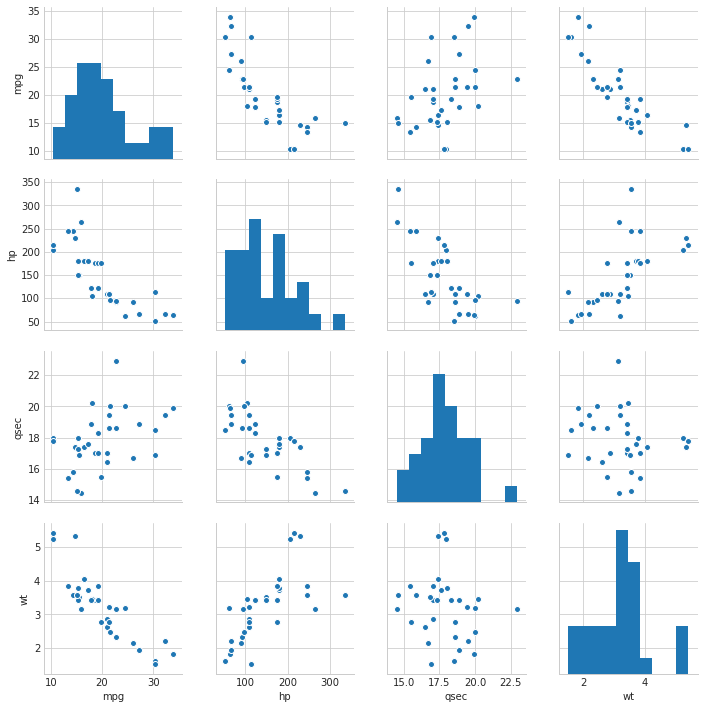

In [26]:
x=cars[['mpg','hp','qsec','wt']]
sb.pairplot(x,palette='hls')

In [28]:
mpg=cars.mpg
qsec=cars.qsec
wt=cars.wt
hp=cars.hp
pearsonr_coeff,p_value=pearsonr(mpg,hp)
print "PearsonR Correlation coefficient %0.3f" %(pearsonr_coeff)

PearsonR Correlation coefficient -0.776


In [29]:
pearsonr_coeff,p_value=pearsonr(mpg,qsec)
print "PearsonR Correlation coefficient %0.3f" %(pearsonr_coeff)

PearsonR Correlation coefficient 0.419


In [30]:
pearsonr_coeff,p_value=pearsonr(mpg,wt)
print "PearsonR Correlation coefficient %0.3f" %(pearsonr_coeff)

PearsonR Correlation coefficient -0.868


In [32]:
corr=x.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


## seaborn visualisation  of correlation

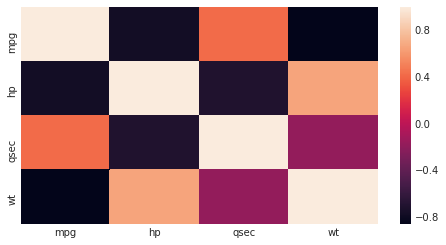

In [36]:
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

## Non paramatric Correlation

In [37]:
#spearman'r rank correlation
#calculates correlation between ordinal variables(ie those that can be categorised)
#model assumes that the variables are related non-linealy and data is non-normally distributed
#Chi square tables 
#1.p<0.05: Reject null hypothesis and conclude variables are correlated
#2.p>0.05:: Accept null hypothesis and conclude variables are independent
# for this model the varibles need to be categorial or binned numeric variables

In [39]:
from scipy.stats import spearmanr
rcParams['figure.figsize']=14,7

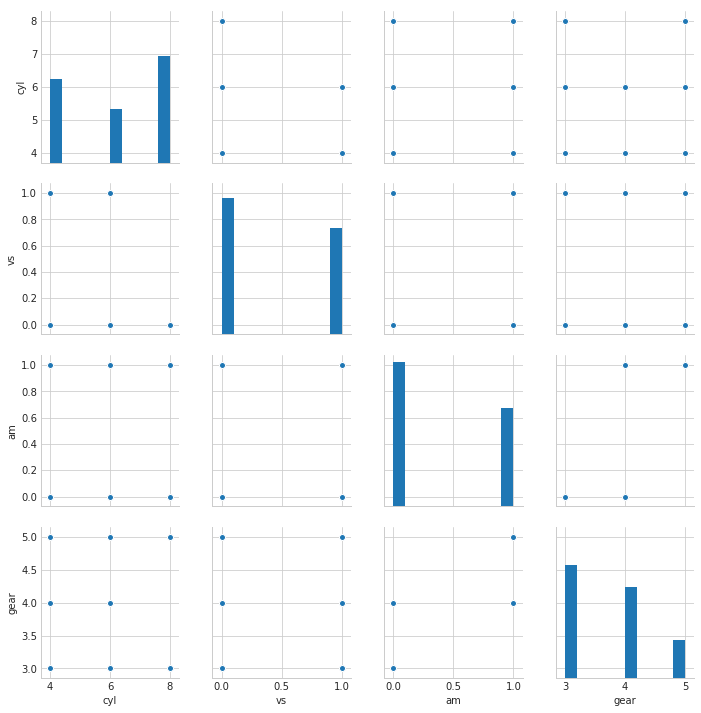

In [41]:
y=cars[['cyl','vs','am','gear']]#ordinal varibles
sb.pairplot(y)

In [43]:
cyl=cars['cyl']
vs=cars['vs']
am=cars['am']
gear=cars['gear']
spearman_coeff,p_value=spearmanr(cyl,vs)
print 'Spearman Correlation Coefficient %0.3f'%(spearman_coeff)

Spearman Correlation Coefficient -0.814


In [44]:
spearman_coeff,p_value=spearmanr(cyl,am)
print 'Spearman Correlation Coefficient %0.3f'%(spearman_coeff)

Spearman Correlation Coefficient -0.522


In [45]:
spearman_coeff,p_value=spearmanr(cyl,gear)
print 'Spearman Correlation Coefficient %0.3f'%(spearman_coeff)

Spearman Correlation Coefficient -0.564


## Chi-Square test for independence 

In [48]:
table=pd.crosstab(cyl,am)
from scipy.stats import chi2_contingency as ch
chi2,p,dof,expected=ch(table.values)
print 'Chi-square Statitics %0.3f p_value %0.3f'%(chi2,p)

Chi-square Statitics 8.741 p_value 0.013


In [49]:
table=pd.crosstab(cyl,vs)
chi2,p,dof,expected=ch(table.values)
print 'Chi-square Statitics %0.3f p_value %0.3f'%(chi2,p)

Chi-square Statitics 21.340 p_value 0.000


In [50]:
table=pd.crosstab(cyl,gear)
from scipy.stats import chi2_contingency as ch
chi2,p,dof,expected=ch(table.values)
print 'Chi-square Statitics %0.3f p_value %0.3f'%(chi2,p)

Chi-square Statitics 18.036 p_value 0.001


# Data Transformation

In [59]:
#so that u dont compare apples with oranges
#normalisation: rescaling data Making values to lie b/w 0-1 (values_of_obs/sum_of_all_obs)
#standardisation: rescaling data making mean of the distribution to be zero and variance to be one
import sklearn
from sklearn import preprocessing 
from sklearn.preprocessing import scale

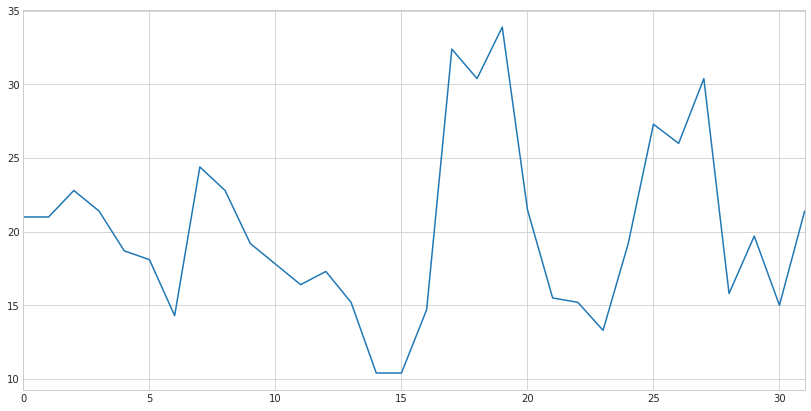

In [52]:
mpg.plot()

In [53]:
mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

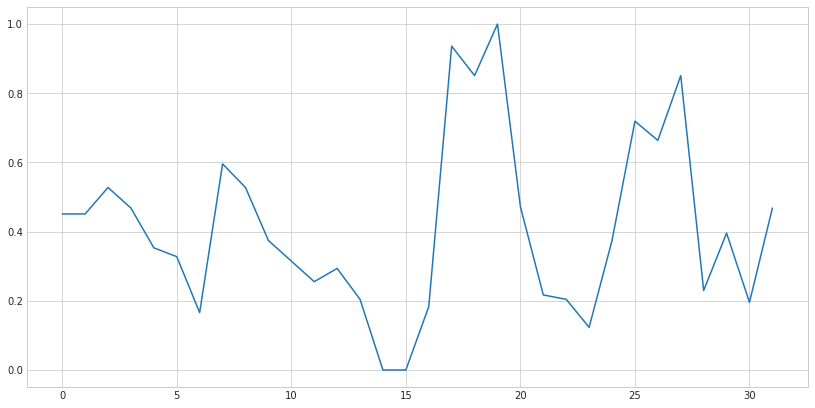

In [63]:
mpg_matrix=mpg.values.reshape(-1,1)
scaled=pp.MinMaxScaler()
scaled_mpg=scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

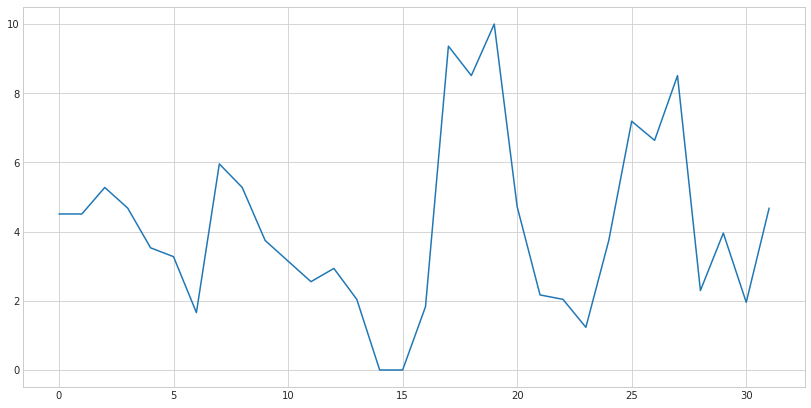

In [64]:
#custom_scaling
mpg_matrix=mpg.values.reshape(-1,1)
scaled=pp.MinMaxScaler(feature_range=(0,10))
scaled_mpg=scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

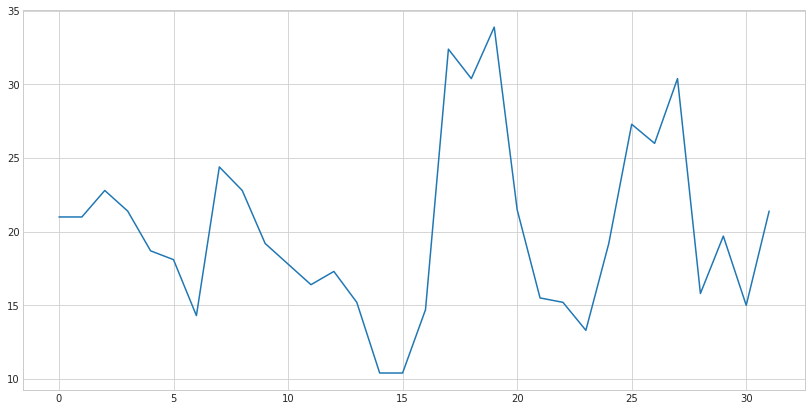

In [66]:
#standardize
standardised_mpg=scale(mpg,axis=0,with_mean=False, with_std=False)
plt.plot(standardised_mpg)

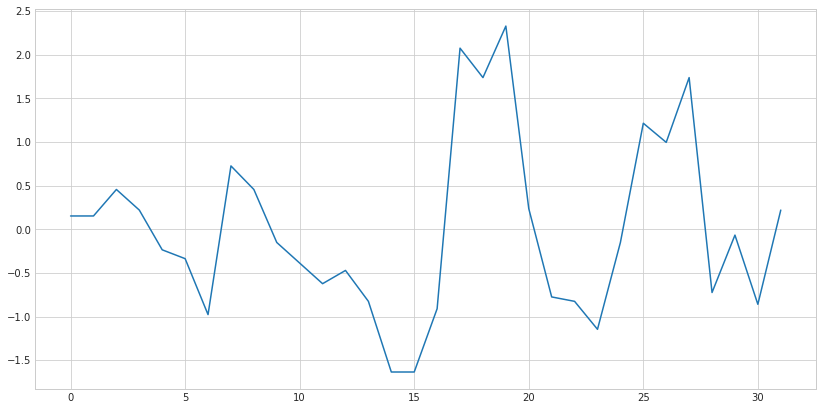

In [67]:
std_mpg=scale(standardised_mpg)#making mean=0 and var=1
plt.plot(std_mpg)